In [2]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

tickers = yf.Tickers("GOOG") 

In [3]:
a=yf.download("MSFT",dt.date.today()-dt.timedelta(36500),dt.date.today(),interval='1d')
print(a)

c:\Users\KILightTouch\Desktop\RandomOdyssey\venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1986-03-13    0.088542    0.101563    0.088542    0.097222    0.059946   
1986-03-14    0.097222    0.102431    0.097222    0.100694    0.062087   
1986-03-17    0.100694    0.103299    0.100694    0.102431    0.063158   
1986-03-18    0.102431    0.103299    0.098958    0.099826    0.061552   
1986-03-19    0.099826    0.100694    0.097222    0.098090    0.060482   
...                ...         ...         ...         ...         ...   
2024-08-26  416.369995  417.279999  411.339996  413.489990  413.489990   
2024-08-27  412.859985  414.359985  410.250000  413.839996  413.839996   
2024-08-28  414.880005  415.000000  407.309998  410.600006  410.600006   
2024-08-29  414.940002  422.049988  410.600006  413.119995  413.119995   
2024-08-30  415.600006  417.489990  412.130005  417.140015  417.140015   

                Volume  
Date        

In [4]:
ticker="irm"
stock_info = yf.Ticker(ticker)
stockPrice=yf.download(ticker,start=dt.date.today()-pd.to_timedelta("7300d"), end=dt.date.today(),interval='1d')
print(stockPrice)

c:\Users\KILightTouch\Desktop\RandomOdyssey\venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-09-08   19.162046   19.334566   19.081947   19.272951    8.032949   
2004-09-09   19.285275   19.500923   19.223660   19.260628    8.027815   
2004-09-10   19.322243   19.661121   19.285275   19.593346    8.166491   
2004-09-13   19.654961   19.993839   19.531731   19.907579    8.297464   
2004-09-14   19.808996   20.462107   19.753544   20.357363    8.484935   
...                ...         ...         ...         ...         ...   
2024-08-26  113.989998  114.790001  113.070000  113.400002  113.400002   
2024-08-27  112.699997  114.930000  112.449997  114.839996  114.839996   
2024-08-28  113.980003  114.699997  111.629997  112.300003  112.300003   
2024-08-29  112.300003  113.400002  111.209999  111.989998  111.989998   
2024-08-30  112.459999  113.489998  111.019997  113.260002  113.260002   

             Volume  
Date           

In [5]:
print(stock_info.capital_gains)

Series([], dtype: object)


c:\Users\KILightTouch\Desktop\RandomOdyssey\venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


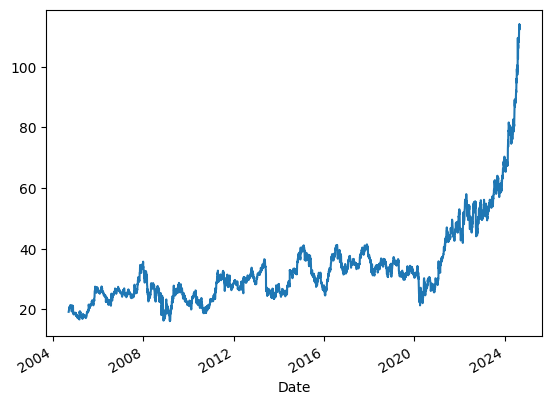

In [6]:
stockPrice["Open"].plot()
plt.show()

In [8]:
stock_hist=stock_info.history(period="max")
stock_hist["Dividends"]

c:\Users\KILightTouch\Desktop\RandomOdyssey\venv\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


Date
1996-02-01 00:00:00-05:00    0.0
1996-02-02 00:00:00-05:00    0.0
1996-02-05 00:00:00-05:00    0.0
1996-02-06 00:00:00-05:00    0.0
1996-02-07 00:00:00-05:00    0.0
                            ... 
2024-08-27 00:00:00-04:00    0.0
2024-08-28 00:00:00-04:00    0.0
2024-08-29 00:00:00-04:00    0.0
2024-08-30 00:00:00-04:00    0.0
2024-09-03 00:00:00-04:00    0.0
Name: Dividends, Length: 7195, dtype: float64

In [54]:
stock_hist['Dividends']

Date
1996-02-01 00:00:00-05:00    0.0
1996-02-02 00:00:00-05:00    0.0
1996-02-05 00:00:00-05:00    0.0
1996-02-06 00:00:00-05:00    0.0
1996-02-07 00:00:00-05:00    0.0
                            ... 
2024-08-26 00:00:00-04:00    0.0
2024-08-27 00:00:00-04:00    0.0
2024-08-28 00:00:00-04:00    0.0
2024-08-29 00:00:00-04:00    0.0
2024-08-30 00:00:00-04:00    0.0
Name: Dividends, Length: 7194, dtype: float64

In [45]:
df = stock_info.quarterly_financials
df= df.T
df.index.name = 'Date'
df.index = pd.to_datetime(df.index)
print(df)

           Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA  \
Date                                                                          
2024-06-30                 -16629404.0              0.278       521023000.0   
2024-03-31                  -5767722.0              0.177       503954000.0   
2023-12-31            -25840020.307757           0.235999       528759000.0   
2023-09-30                  -1474312.0              0.098       467905000.0   
2023-06-30                 -12737970.0               0.21       413695000.0   
2023-03-31                         NaN                NaN               NaN   
2022-12-31                         NaN                NaN               NaN   

           Total Unusual Items Total Unusual Items Excluding Goodwill  \
Date                                                                    
2024-06-30         -59818000.0                            -59818000.0   
2024-03-31         -32586000.0                            -32586000.0

In [61]:
stock_info = yf.Ticker("asddddasd")
a=stock_info.isin
a

404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ASDDDDASD?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ASDDDDASD&crumb=YpeOL61X7b.


'-'

In [59]:
a={};type(a)

dict